In [2]:
import pandas as pd

df = pd.read_csv("./Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
df.duplicated().sum()

127

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

In [9]:
df["extracurricular_activities"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
df["extracurricular_activities"] = lb.fit_transform(df["extracurricular_activities"])
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


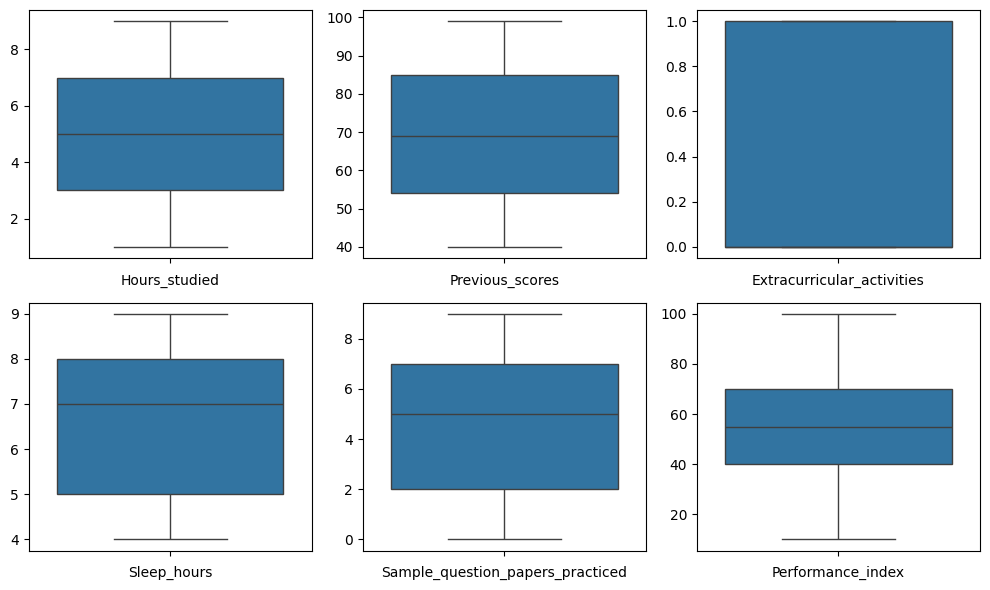

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for i in range(len(df.columns)):
    plt.subplot(2,3,i + 1)
    sns.boxplot(df[df.columns[i]])
    plt.xlabel(f"{df.columns[i].capitalize()}")
    plt.ylabel("")

plt.tight_layout()
plt.show()

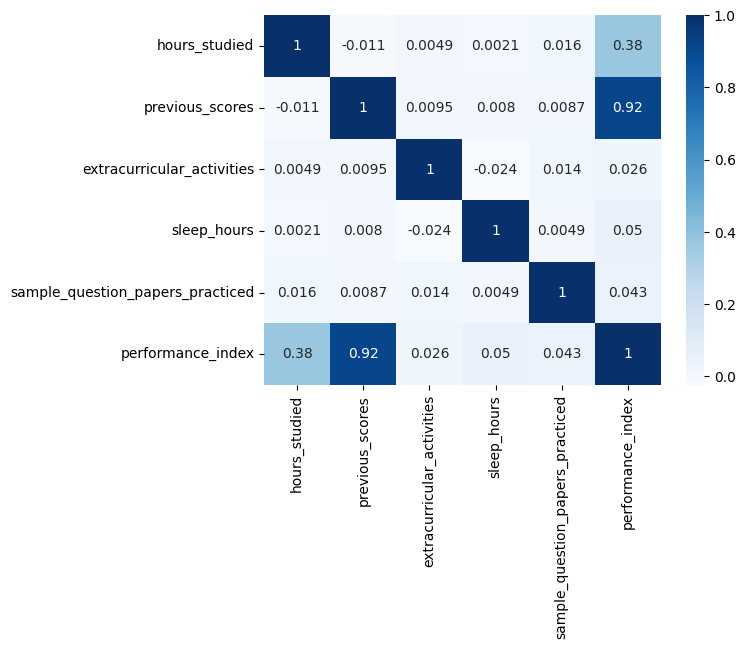

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

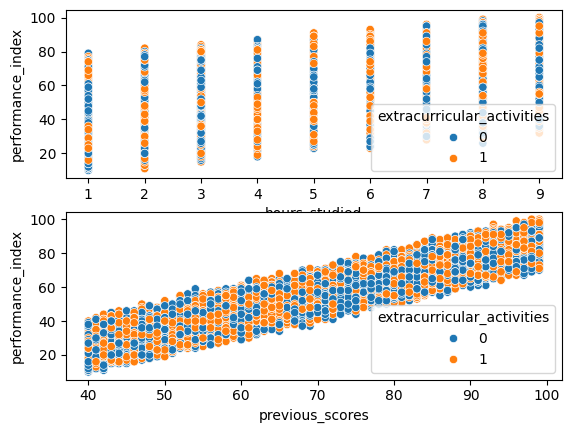

In [13]:
plt.subplot(211)
sns.scatterplot(df, x="hours_studied", y="performance_index", hue="extracurricular_activities")

plt.subplot(212)
sns.scatterplot(df, x="previous_scores", y="performance_index", hue="extracurricular_activities")

plt.show()

In [24]:
df[df["performance_index"]>= 90]["extracurricular_activities"].value_counts()

extracurricular_activities
1    148
0    117
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

X, y = df.drop(columns="performance_index"), df["performance_index"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracy_model = []
for n in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_model.append(r2_score(y_test, y_pred))
    
best_n = pd.Series(accuracy_model).idxmax()

best_model = KNeighborsRegressor(best_n)
best_model.fit(x_train, y_train)
best_y_pred = best_model.predict(x_test)

r2_score(y_test, y_pred)


0.9842647838736067